# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [5]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer: **

* First off, the smartcab does NOT move at all during the simulation so far since the agent is not set to learn. 
* Since the rewards that the cab receives is based off of the action that the car took in a specific world-state, the rewards can be either positive or negative. 
* For example, the first action it took was "to idle at a green light with no oncoming trafffic" as a result, the agent received a reward of -5.14. However, further down the action-log sequence that was generated, the agent received a reward of 1.07 for properly idling at a redlight. Therefore, the changing of the lights impacted the possible rewards by increasing them when the agent took that same action of idling.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 

----
- For the agent.py file the flags that were changed were: 
  -  num_dummies from 100 to 25,
     -  The effect of decreasing num_dummies was that the number of cars in the simulation was decreased by 3/4. This in turn caused the amount of incoming traffic to be reduced which in turn reduced the penalties for the agent selecting to idle since it was not causing as much traffic anymore. 

  -  grid_size from (8,6) to (5,5) and
     - The effect of decreasing the grid size however, was the opposite of what decreasing the number of dummies. If the grid world is smaller than the chance of the agent interacting with other cars goes up -- as some function of the number of cars and their placement in the world. 

  - enforce_deadline from False to True
    - Finally, turning on the enforce_deadline flag, made it so that the agent only had 20 moves to reach its destination rather than the previous limit of 100 moves. 

----

- For the environment.py file the Environment class function that is called when an agent performs an action is the act function. The act function takes in self and action and returns the rewards for taking that specific action in the current world_state.

----

- The difference between the render_text() function and the render() function in the simulator.py file is that in:
  - render_text(), "[which is] the non-GUI render display of the simulation. Simulated trial data will be rendered in the terminal/command prompt." (i.e. you will not be able to watch what is happening in the simulation. Instead you will have to read what happens as it gets printed in the terminal.
  - render(), "[which is] the GUI render display of the simulation. Supplementary trial data can be found from render_text." In this case, the programmer will be able to watch what the agent does in the simulation while it is running. If they desire the additional information that gets played in the render_text function, that is now stored in the logs.

----

- The next_waypoint function in the planner.py file "Creates the next waypoint based on current heading, location, intended destination and L1 distance from destination." Between the two checks, the function first looks to see if the destination is due East/West of the current position. Then it will check if he destination is due North/South.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


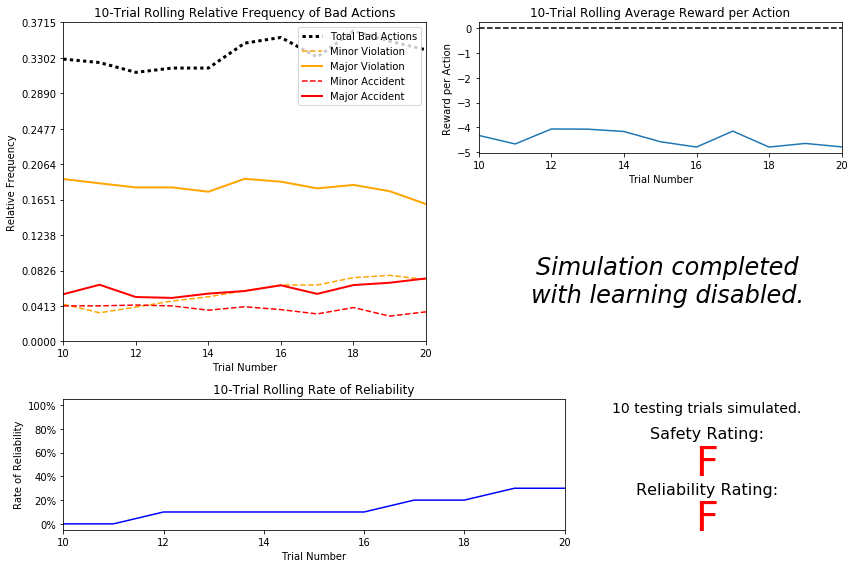

In [6]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

----
- The agent is making bad decision almost(/a bit more than) 33%  of the time. Those bad decision are causing accidents around 9% of the time.

- Given that the agent is choosing its action randomly, I'm honestly a bit surprised that it is only getting into a accident ~10% of the time. And this relaibility makes sense since the actions that the agent is taking at any given time is just completely random. There is no learning going on here. 

- The agent is receiving entirely negative rewards for its actions.

- As the number of trials increases, the outcome of the results changes quite significantly. The rate of reliability goes up from zero to around 35%.

- That amount of success (measured as reliability) is still entirely unacceptable, however, it is still quite a bit of an increase. Therefore the smartcab would not be considered even remotely safe or reliable for its passengers. If we had 10% of either dying or not reaching our goals every time that we entered a vehicle, cars would not be used as the main form of transportation in the USA. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer: **

For learning safety independently, the most important features are 'inputs' -- **light, left, right, and oncoming.** 

For learning efficiency independently, the most imporant feature is **waypoint**. Once we can get the agent to successfully navigate to the destination, then we can focus on getting there within the deadline. 

For learning both of these things simultaneously, all of the features are important in some respect. With the inputs tuple, you get information about what the envorinment looks like in a local-area -- useful for maximizing safety. With the waypoint and deadline features, you get information about where you need to end up and how long you have to get to your destination -- good for maximizing efficiency. Therefore, this information deals on a more global scale. By then putting both of these pieces of information together you can have a look at both local and global information. Therefore, these are enough to model the environment.  

Furthermore, since the smartcab relies on a planner to plot its course, if we make the assumption that the planner is giving us the optimal "route" as a function of the waypoint, then by following the waypoint, we should reach the destination before the deadline comes into effect. Therefore, I've chosen to cut that attribute from the state variable since it will increase the search space by a factor of 30(or however long the agent has to reach its destination)!

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The size of the state-space would be the multiplication of the number of possible answers/element of tuple. Therefore if the choices for each slot were to be the following -- (3C1, (2C1, 4C1, 4C1, 4C1)) -- then the size of our search space is: 4 x 4 x 4 x 3 x 2 = 384 possible states. Then to get how many Q-state-action-pairs there will be, we just multiply the number of states by the number of possible action Go (left, right, forward, stay). Therefore we now have to iterate over 1536 different pairs. 

I do think that the driving agent could learn a policy for each possible state within a reasonable number of training trials (around 1000). This simulation is sufficently simplified that a computer can solve for a solution fast enough -- presumeing we're not operating in something like O(N^N) time. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interactive update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

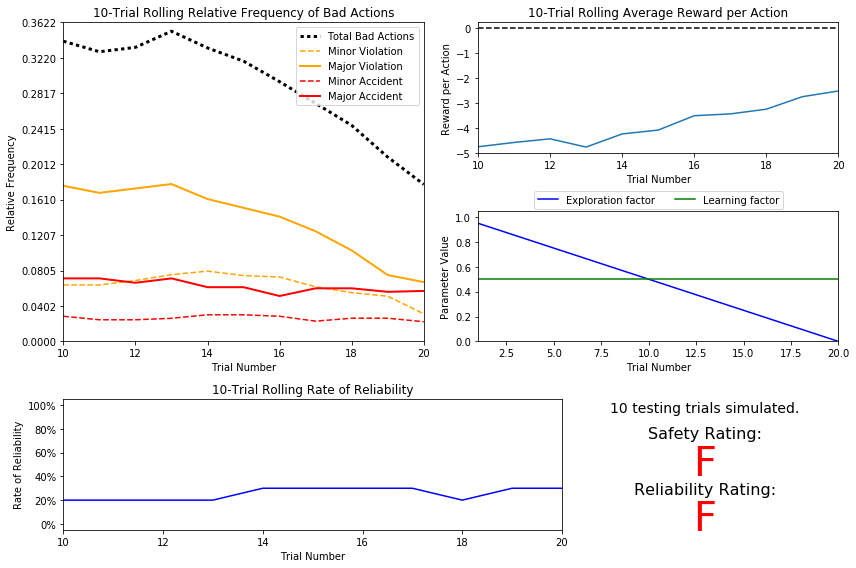

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

* In the case where epsilon decays at a rate of 5%, the end result of both high-level metrics are unchagned -- the smartcab received an F in both safety and reliability. However, if epsilon's decay is lenthened to around 1% for each time step (resulting in around 100 training sims), the reliability of the car goes up to a C. With both taking random actions and this simple version of Q-learning, the agent ends with a reliability well below acceptable. Furthermore, both tests keep the average rewards in the negative. 

* The number of training trials is exactly a function of the rate of decay of epsilon. When I had epsilon decaying by 5% each time-step, there were 20 training trails. When I had epsilon decaying by 0.5% there were 200 training trials. The trails v parameter-value graph does correctly show both my exploration and learning factors (epsilon and alpha). 

* When epsilon decayed at a rate of -.005, the number of training trails increased there was a slight decrease in the number of bad actions, however, it remained at around the same amount as there were at the start. When epsilon decayed at a -.05, the number of bad actions by around a factor of 2 as the number of trails increased. When using a slower decaying epsilon, the average reward however, increased significantly from slightly greater than -5 to just shy of -1. When using the faster decaying epsilon, the average reward increased from around -3 to -2.

* The Q-learned agent did equally as badly with regard to safety and reliability as the random-choice agent whenever epsilon decreased at a -.05 rate. When that decay was lenthened to -.001, the agent learned both of those measure extremely well (A+ for both).  

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

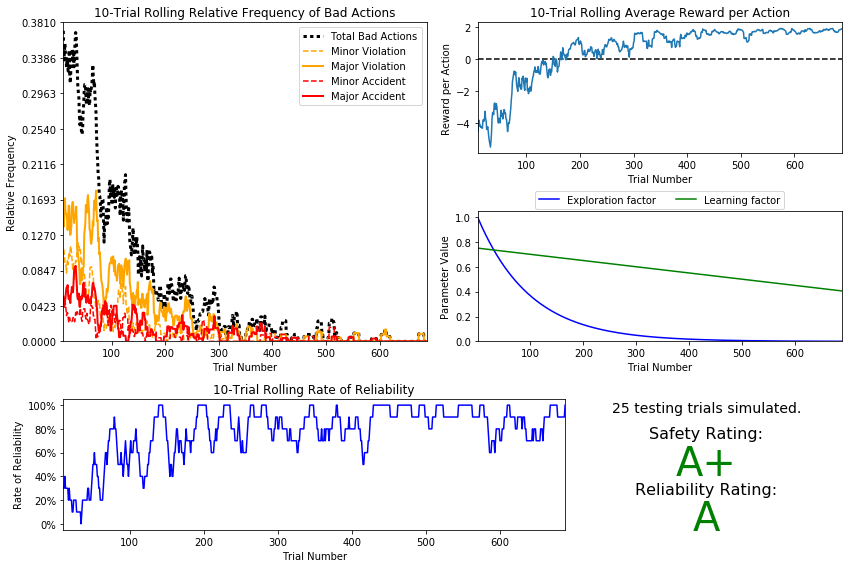

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

* My decay function was e(t) = a^t where a=0.99 and t = # of trials elapsed.

* My agent required around 700 training trails before I allowed it to move on to testing.

* The epsilon tolerence was 0.001. My alpha decayed according to: alpha_t+1 = alpha_t - 0.0005 and alpha_0 = 0.75.
  - The reason that Epsilon's tolerence was 0.001 was to ensure that the agent would train for long enough. I found that with larger epsilons the agent ended up testing before it had finished learning. And from messing around with the simple-driving agent that the longer the agent trained the better the results
  - Given that this is a deterministic world, I knew that alpha needed to be relatively high. Therefore, I started it off at 0.75. However, I wanted it to decay as time passed. I had alpha decay because then if the behaviours learned at the start were correct the chance of future mistakes being learned was minimized. And if the agent was not learning the correct behaviour until late in the training, even though that part would have less individual impact, the later trails could still overwhelm older knowledge so long as it was consistently reinforced. 
  
* Off the bat, this question isn't quite fair. If I were comparing the final improved agent against the first simple agent. While the improved agent trained for around 700 simulations, the simple agent only got to train on 20 (I did also run that agent when training on around 1000 simulations as well). In the case where the simple agent only trained on 20 simulations, the improvment of the optimized agent is just about as drastic as can be. Where the simple agent got Fs on both metrics, the improved agent got an A+ on safety and an A on reliability. When, however, compared against the simple agent trained on 1000 simulations (which got a pair of A+s), the improved agent actually did just slightly worse by getting an A+ on safety and only an A on reliability. That being said, the improved agent only trained on roughly 700 simulations whereas the simple agent trained on ~1000. Therefore, the improved agent is indeed optomized with respect to the amount of training time. 

* I would say that the agent learned sucessfully learned an appropriate policy. 

* Anything less than perfection on a self-driving car is not acceptable. That being said, since the imperfection is on the reliability metric, I am more willing to let that slide. If, however, it was safety that received an A, I would feel like I need to keep tuning the agent since even on accident is too much when it can kill someone, but being slighlty late to a meeting can be forgiven.  

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

So, the first part to this question is what is the true policy?
 
----

Since the true policy is independent of our tests (becuase we were  trying to learn US Right of Way Laws) we can write out what the optimal policy is.

----

    if waypoint == forward:

        if light == red:
            stay
        else:
            if oncoming != right:
                forward
            else:
                stay
                
    elif waypoint == left:

        if light == red:
            stay
        else:
            if oncoming == left || oncoming == forward:
                stay
            else:
                left
                
    else:

        if light == red:
            if oncoming != right and right_car != forward:
                right
            else:
                stay
        else:
            if oncoming != right:
                right
            else:
                stay
                
----

Using this policy above, lets evaluate how the learner did at different points in the training.

Given that the state variable, S, which looks like: ('waypoint', 'left', 'right', 'light', 'oncoming')

With Q-values of:

* Q(S|forward) : Q1
* Q(S|right) : Q2
* Q(S|None) : Q3
* Q(S|left) : Q4

lets take a look at the policy generated by our value-iteration and Q-learning

----

If S = ('left', None, None, 'red', 'left'), then
* Q(S|forward) : -9.77
* Q(S|right) : 0.57
* Q(S|None) : 2.02
* Q(S|left) : -9.42

and the best choice comes out to be None -- which matches with our policy above. 1/1

----

If S = ('right', 'forward', 'forward', 'red', 'right')
* Q(S|forward) : -21.08
* Q(S|right) : -13.86
* Q(S|None) : 0.61
* Q(S|left) : 0.00

And the best choice now is None -- which again matches our policy.   2/2

----

If S = ('right', 'right', 'left', 'red', None)
* Q(S|forward) : -7.38
* Q(S|right) : 1.91
* Q(S|None) : 0.69
* Q(S|left) : -7.55

Here the best choice to make is Right -- which again matches. 3/3

----

So far we have matched the optimal policy at every point.

----

However, here is a state which does not follow the optimal policy. 

If S = ('left', 'right', 'left', 'green', 'forward')
* Q(S|forward) : 0.00
* Q(S|right) : 0.00
* Q(S|None) : 0.00
* Q(S|left) : -13.63

In this case, the agent it told to randmly make ANY of the three choices which maximize Q. According to the policy defined above, the correct action would have been to stay, and then reevaluate at the next time step. Therefore, this choice now of 'randomly choose from the other three options' will still keep the smartcab safe, however, it has the potential to increase the amount of time that it would take for the smartcab to reach its destination, thus potentially decreasing the reliability. 

Since the agent was not told to not take the optimal action, I'd say that we've now matched 3.5/4

### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

* As for why gamma is not useable because of the environment, I would guess that that is because there is no way to "look into future states" without  actually activating the transition model. The environment is always changing. Therefore, when you try to get the utility of neighbor states rather than looking into the future state, instead you actively change the world-state. And since the world-state is now different, you cannot unwind the changes you made to get the utility of the started-in state.

* The agent in this simulation seems to be "greedy" in the sense that it is only caring about what happens locally. The agent is only caring what happens with the cars that are directly to the left, right, and infront of it -- and this is true no matter where the agent is. Therefore, since the agent is not taking anything outside of its immediate vacinity into account (such as, is the car that is directly behind the oncoming car turning right?). If we could see more cars than just the immediate surrounding, then we could worry about the possible actions that those cars might make, which would in turn impact the untility of the state we're in and therefore would then need gamma to remind us that we're simply predicting how the cars might act in further states.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.